# Exercises

In [1]:
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.corpus import brown, gutenberg, state_union, webtext, wordnet as wn
import pandas as pd
import seaborn as sns

sns.set()
%matplotlib inline

### 1. Create a variable ```phrase``` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [2]:
phrase = ["Today", "is", "Monday", "."]

In [3]:
phrase + phrase

['Today', 'is', 'Monday', '.', 'Today', 'is', 'Monday', '.']

In [4]:
phrase * 3

['Today',
 'is',
 'Monday',
 '.',
 'Today',
 'is',
 'Monday',
 '.',
 'Today',
 'is',
 'Monday',
 '.']

In [5]:
phrase.index("is")

1

In [6]:
phrase[1:3]

['is', 'Monday']

In [7]:
sorted(phrase, reverse=True)

['is', 'Today', 'Monday', '.']

### 2. Use the corpus module to explore ```austen-persuasion.txt```. How many word tokens does this book have? How many word types?

In [8]:
persuasion = gutenberg.words('austen-persuasion.txt')

In [9]:
len(persuasion)

98171

In [10]:
len(set(persuasion))

6132

### 3. Use the Brown corpus reader ```nltk.corpus.brown.words()``` or the Web text corpus reader ```nltk.corpus.webtext.words()``` to access some sample text in two different genres.

In [11]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [12]:
brown.words(categories='editorial')

['Assembly', 'session', 'brought', 'much', 'good', ...]

In [13]:
webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [14]:
firefox_id = webtext.fileids()[0]

webtext.words(fileids=firefox_id)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [15]:
wine_id = webtext.fileids()[-1]

webtext.words(fileids=wine_id)

['Lovely', 'delicate', ',', 'fragrant', 'Rhone', ...]

### 4. Read in the texts of the *State of the Union* addresses, using the ```state_union``` corpus reader. Count occurrences of ```men```, ```women```, and ```people``` in each document. What has happened to the usage of these words over time?

In [16]:
state_union_words = state_union.words()

In [17]:
print("men", "women", "people", sep='\t')
for fileid in state_union.fileids():
    fdist = FreqDist(state_union.words(fileids=fileid))
    print(fdist["men"], fdist["women"], fdist["people"], sep='\t')

men	women	people
2	2	10
12	7	49
7	2	12
4	1	22
2	1	15
6	2	15
8	2	9
3	0	17
2	0	15
4	0	26
2	2	30
5	2	11
2	1	19
4	1	11
2	0	10
6	0	10
6	2	10
0	0	3
8	5	12
3	1	3
7	0	16
11	3	14
12	1	35
11	1	25
4	0	17
5	2	6
2	0	23
1	0	31
1	0	7
0	0	9
0	0	19
0	0	13
3	1	18
2	1	17
0	1	26
0	1	15
1	2	11
1	1	11
1	1	17
3	7	19
3	5	23
1	1	12
2	2	14
1	0	24
1	0	16
2	3	13
3	2	9
2	2	13
7	7	13
4	4	26
1	2	45
1	1	63
1	3	73
2	3	40
1	2	30
2	2	22
2	3	22
5	6	41
3	3	14
1	2	12
3	5	14
6	4	33
6	8	21
8	11	18
7	7	22


In [18]:
is_ratio = False

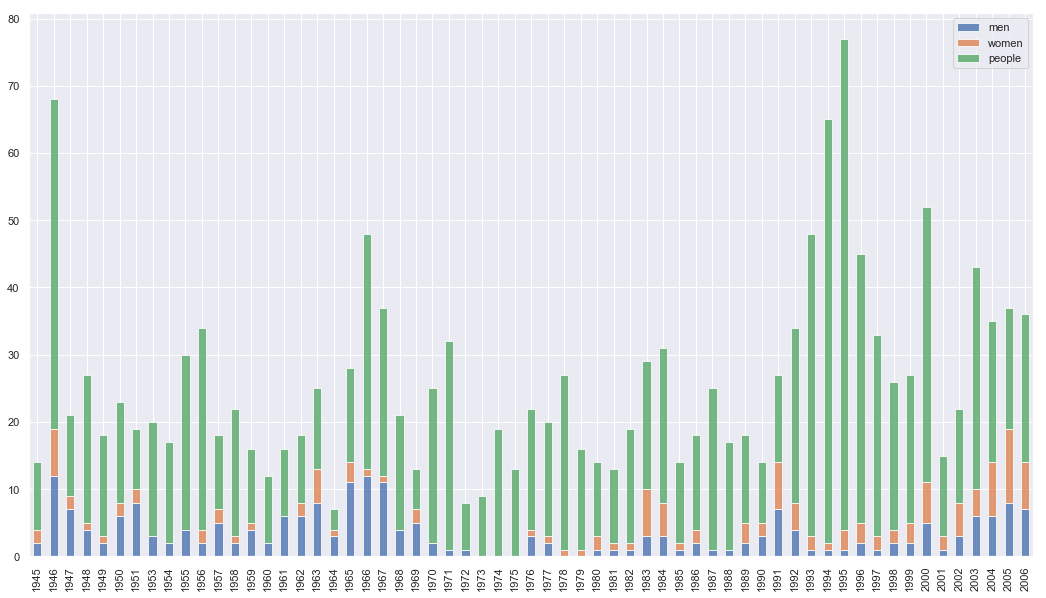

In [19]:
df_state_union = pd.DataFrame(index=["men", "women", "people"])

for fileid in state_union.fileids():
    year = fileid.split('-')[0]
    fdist = FreqDist(state_union.words(fileids=fileid))
    if is_ratio:
        total = fdist["men"] + fdist["women"] + fdist["people"]
    else:
        total = 1
    df_state_union.loc["men", year] = fdist["men"] / total
    df_state_union.loc["women", year] = fdist["women"] / total
    df_state_union.loc["people", year] = fdist["people"] / total

df_state_union = df_state_union.transpose()
df_state_union.plot(kind='bar', figsize=(18,10), stacked=True, alpha=0.8)

The usage of the words has fluctuated over time. For example, it increased from from 1990 to 1995 but decreased from 1996 to 1998. Also the usage of ```women``` is increased since 2001.

### 5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: ```member_meronyms()```, ```part_meronyms()```, ```substance_meronyms()```, ```member_holonyms()```, ```part_holonyms()```, and ```substance_holonyms()```.

In [20]:
wn.synsets("car")

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [21]:
car = wn.synsets("car")[0]

In [22]:
car.member_meronyms()

[]

In [23]:
car.part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

In [24]:
car.substance_meronyms()

[]

In [25]:
car.member_holonyms()

[]

In [26]:
car.part_holonyms()

[]

In [27]:
car.substance_meronyms()

[]

In [28]:
wn.synsets("accelerator")

[Synset('accelerator.n.01'),
 Synset('accelerator.n.02'),
 Synset('catalyst.n.01'),
 Synset('accelerator.n.04')]

In [29]:
accelerator = wn.synsets("accelerator")[0]

In [30]:
accelerator.member_meronyms()

[]

In [31]:
accelerator.part_meronyms()

[]

In [32]:
accelerator.substance_meronyms()

[]

In [33]:
accelerator.member_holonyms()

[]

In [34]:
accelerator.part_holonyms()

[Synset('airplane.n.01'), Synset('car.n.01')]

In [35]:
accelerator.substance_holonyms()

[]

### 6. In the discussion of comparative wordlists, we created an object called ```translate``` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

### 7. According to Strunk and White's *Elements of Style*, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the *LanguageLog* posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which *initial* letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

### 9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as *monstrous* in *Moby Dick* and in *Sense and Sensibility*?


### 10. Read the BBC News article: *UK's Vicky Pollards 'left behind'* http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on *LanguageLog*, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

### 12. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

### 13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using ```wn.all_synsets('n')```.

### 14. Define a function ```supergloss(s)``` that takes a synset ```s``` as its argument and returns a string consisting of the concatenation of the definition of ```s```, and the definitions of all the hypernyms and hyponyms of ```s```.

### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (```nltk.corpus.brown.categories()```). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

### 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

### 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

### 19. Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

### 20. Write a function ```word_freq()``` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.